# The Curse of Dimensionality

The curse of dimensionality boils down to the fact that high-dimensional spaces are vast. Points in high-dimensional spaces tend not to be close to one another at all.

To demonstrate, let's generate randomly pairs of points in the d-dimensional "unit cube" in a variety of dimensions, and calculate the distances between them.

In [1]:
from typing import List
from scratch.linear_algebra import Vector, distance
import random

def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

In [2]:
# For every dimension from 1 to 100, compute 10k distances and their average and minimum distance

import tqdm
dimensions = range(1, 501)

avg_distances = []
min_distances = []

random.seed(0)
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
    distances = random_distances(dim, 10_000) # 10k random pairs
    avg_distances.append(sum(distances) / 10_000) # track average
    min_distances.append(min(distances)) # track the minimum

Curse of Dimensionality: 100%|██████████| 500/500 [06:01<00:00,  1.42s/it]


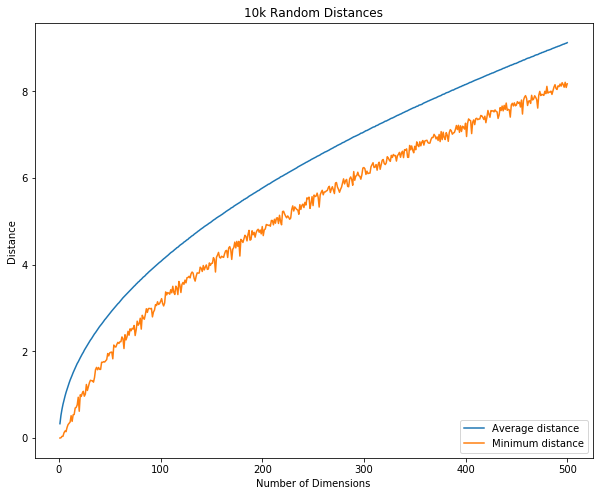

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.title("10k Random Distances")
plt.xlabel("Number of Dimensions")
plt.ylabel("Distance")

plt.plot(dimensions, avg_distances, label='Average distance')
plt.plot(dimensions, min_distances, label='Minimum distance')
plt.legend(loc=4)

plt.savefig('images/curse_of_dimensionality.png')
plt.show();

`As the number of dimensions increases, the average distance between points increses`.

In [4]:
# The ratio between the closest distance and the average distance
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]

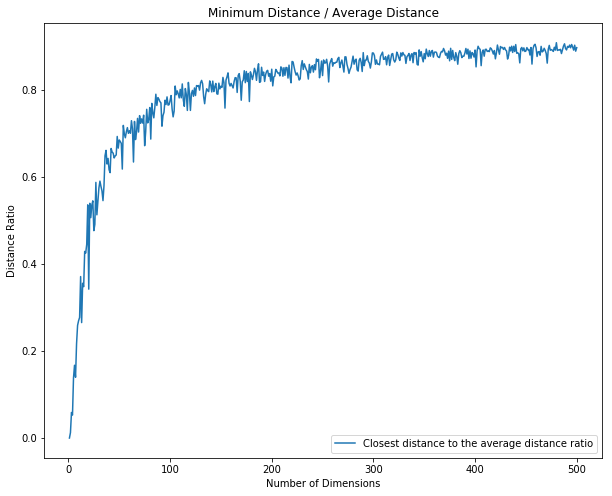

In [11]:
plt.figure(figsize=(10,8))
plt.title("Minimum Distance / Average Distance")
plt.xlabel("Number of Dimensions")
plt.ylabel("Distance Ratio")

#plt.plot(dimensions, avg_distances, label='Average distance')
#plt.plot(dimensions, min_distances, label='Minimum distance')
plt.plot(dimensions, min_avg_ratio, label='Closest distance to the average distance ratio')
plt.legend(loc=4)

plt.savefig('images/curse_of_dimensionality2.png')
plt.show();

In low-dimensional data sets, the closest points tend to be much closer than average. But `two points are close only if they’re close in every dimension`, and every extra dimension—even if just noise—is another opportunity for each point to be further away from every other point. `When you have a lot of dimensions, it’s likely that the closest points aren’t much closer than average, which means that two points being close doesn’t mean very much` (unless there’s a lot of structure in your data that makes it behave as if it were much lower-dimensional).

In [17]:
2/3

0.6666666666666666

In [18]:
2900/3000

0.9666666666666667